#### Import necessary libraries

In [460]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.dates as mdates

In [2]:
cmap = 'cmo.curl'
SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
try:
    plt.rc('text', usetex = False)
except:
    print('No Tex!')
plt.rc('font', size=SMALL_SIZE,family='serif')          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE,linewidth=1)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#### Load files

In [3]:
def read_csv(path, typ = True):
    if typ == True:
        return pd.read_csv(path, delimiter=",", engine="python", index_col='Unnamed: 0')
    return pd.read_csv(path, delimiter=",", engine="python")

In [4]:
foldername = 'STRPMr'

pred2 = read_csv(f"../final results/{foldername}/Qualitative/2hrs/predictions_2h.csv")
pred3 = read_csv(f"../final results/{foldername}/Qualitative/3hrs/predictions_3h.csv")
pred4 = read_csv(f"../final results/{foldername}/Qualitative/4hrs/predictions_4h.csv")
pred8 = read_csv(f"../final results/{foldername}/Qualitative/8hrs/predictions_8h.csv")
pred12 = read_csv(f"../final results/{foldername}/Qualitative/12hrs/predictions_12h.csv")

strpmr2 = read_csv(f"../final results/{foldername}/Qualitative/2hrs/forecasts_2h.csv")
strpmr3 = read_csv(f"../final results/{foldername}/Qualitative/3hrs/forecasts_3h.csv")
strpmr4 = read_csv(f"../final results/{foldername}/Qualitative/4hrs/forecasts_4h.csv")
strpmr8 = read_csv(f"../final results/{foldername}/Qualitative/8hrs/forecasts_8h.csv")
strpmr12 = read_csv(f"../final results/{foldername}/Qualitative/12hrs/forecasts_12h.csv")

In [5]:
foldername = 'STRPM'
strpm2 = read_csv(f"../final results/{foldername}/Qualitative/2hrs/forecasts_2h.csv", False)
strpm3 = read_csv(f"../final results/{foldername}/Qualitative/3hrs/forecasts_3h.csv", False)
strpm4 = read_csv(f"../final results/{foldername}/Qualitative/4hrs/forecasts_4h.csv", False)
strpm8 = read_csv(f"../final results/{foldername}/Qualitative/8hrs/forecasts_8h.csv", False)
strpm12 = read_csv(f"../final results/{foldername}/Qualitative/12hrs/forecasts_12h.csv", False)

In [6]:
foldername = 'Baseline'
baseline2 = read_csv(f"../final results/{foldername}/Qualitative/2hrs/forecasts_2h.csv")
baseline3 = read_csv(f"../final results/{foldername}/Qualitative/3hrs/forecasts_3h.csv")
baseline4 = read_csv(f"../final results/{foldername}/Qualitative/4hrs/forecasts_4h.csv")
baseline8 = read_csv(f"../final results/{foldername}/Qualitative/8hrs/forecasts_8h.csv")
baseline12 = read_csv(f"../final results/{foldername}/Qualitative/12hrs/forecasts_12h.csv")

In [304]:
# List of all models forecasted timeseries for different forecasting horizons (2-12 hours)
strpm = [strpm2,  strpm4, strpm8, strpm12]
baseline = [baseline2,  baseline4, baseline8, baseline12]
pred_strpmr = [pred2, pred4, pred8, pred12]
strpmr = [strpmr2, strpmr4, strpmr8, strpmr12]

In [294]:
#load Göttingen files
gott_strpmr2 = read_csv(f"../final results/validation_with_Göttingen_data/STRPMr/Qualitative/2hrs/forecasts_2h.csv", False)
gott_strpmr3 = read_csv(f"../final results/validation_with_Göttingen_data/STRPMr/Qualitative/3hrs/forecasts_3h.csv", False)
gott_strpmr4 = read_csv(f"../final results/validation_with_Göttingen_data/STRPMr/Qualitative/4hrs/forecasts_4h.csv", False)
gott_strpmr8 = read_csv(f"../final results/validation_with_Göttingen_data/STRPMr/Qualitative/8hrs/forecasts_8h.csv", False)
gott_strpmr12 = read_csv(f"../final results/validation_with_Göttingen_data/STRPMr/Qualitative/12hrs/forecasts_12h.csv", False)
gott_strpmr = [gott_strpmr2, gott_strpmr4, gott_strpmr8, gott_strpmr12]

#### Plot STRPMr individual plots

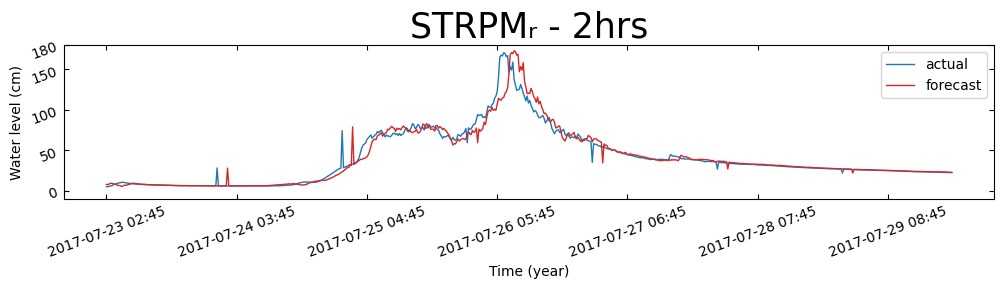

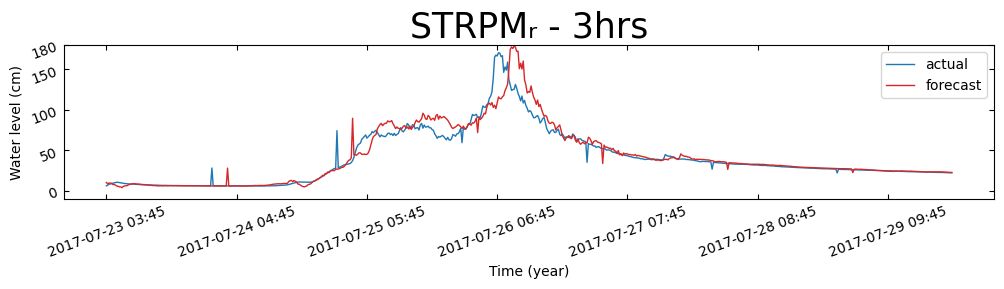

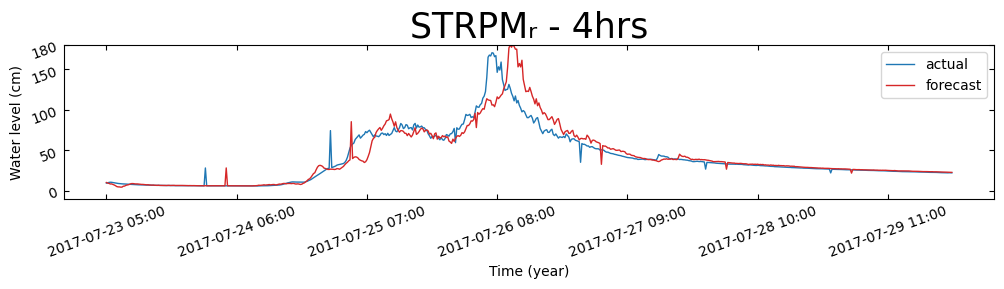

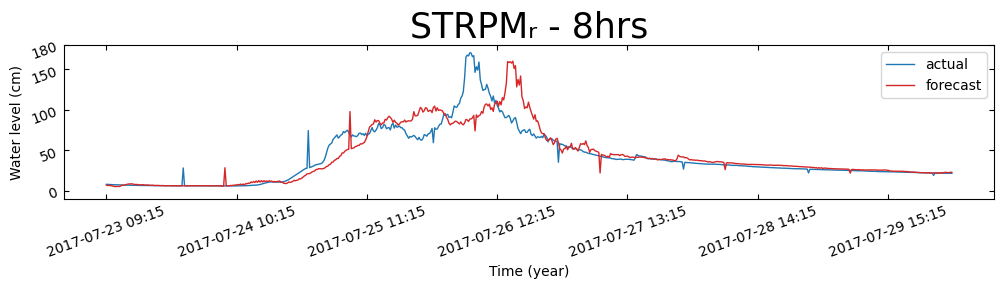

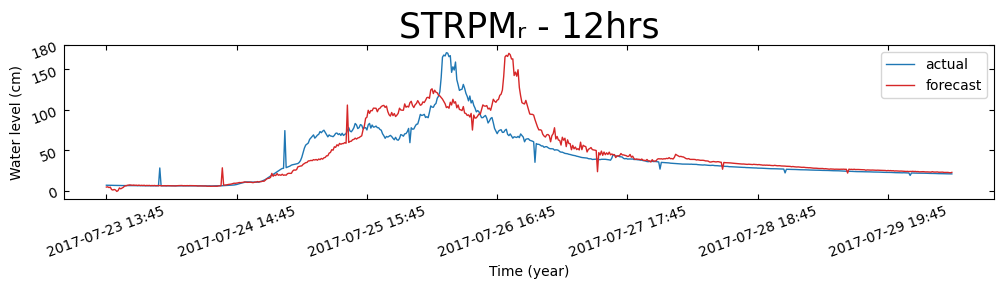

In [ ]:
def get_subscript(x): 
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s)) 
    return x.translate(res) 


def individualplots(df, h, t):
    fig, ax = plt.subplots(1, 1, figsize=(12, 2))
    df['measured'][18300:18950].plot(subplots=True, ax=ax, legend=True, color='tab:blue', lw=1.0)
    df['predicted'][18300:18950].plot(subplots=True, ax=ax, legend=True, color='tab:red', lw=1.0)
    ax.set_ylim(-10, 180)
    ax.set_yticks([0.0, 50, 100, 150, 180])
    ax.set_title(t, fontsize=25)
    ax.set_ylabel('Water level (cm)')
    ax.tick_params(direction="in",top=True,right=True,which='both', labelrotation=20)
    ax.set_xlabel('Time (year)')
    labels = ['actual', 'forecast']
    ax.legend(labels, loc = 'upper right',  bbox_transform = plt.gcf().transFigure)
    plt.savefig(f'../final results/STRPMr/Qualitative/{h}hrs/{t}.pdf', dpi=300, bbox_inches = 'tight');

def plotindividualplots(title):
    hours = [2, 4, 8, 12]
    ddir = '../final results/STRPMr/Qualitative/' 
    for h in hours:
        t = f'{title} - {h}hrs'
        forecast = read_csv(ddir+f"{h}hrs/forecasts_{h}h.csv")
        forecast.dropna(axis=1, inplace=True)
        individualplots(forecast, h, t)

title = f"STRPM{get_subscript('r')}"
framework_result = plotindividualplots(title)

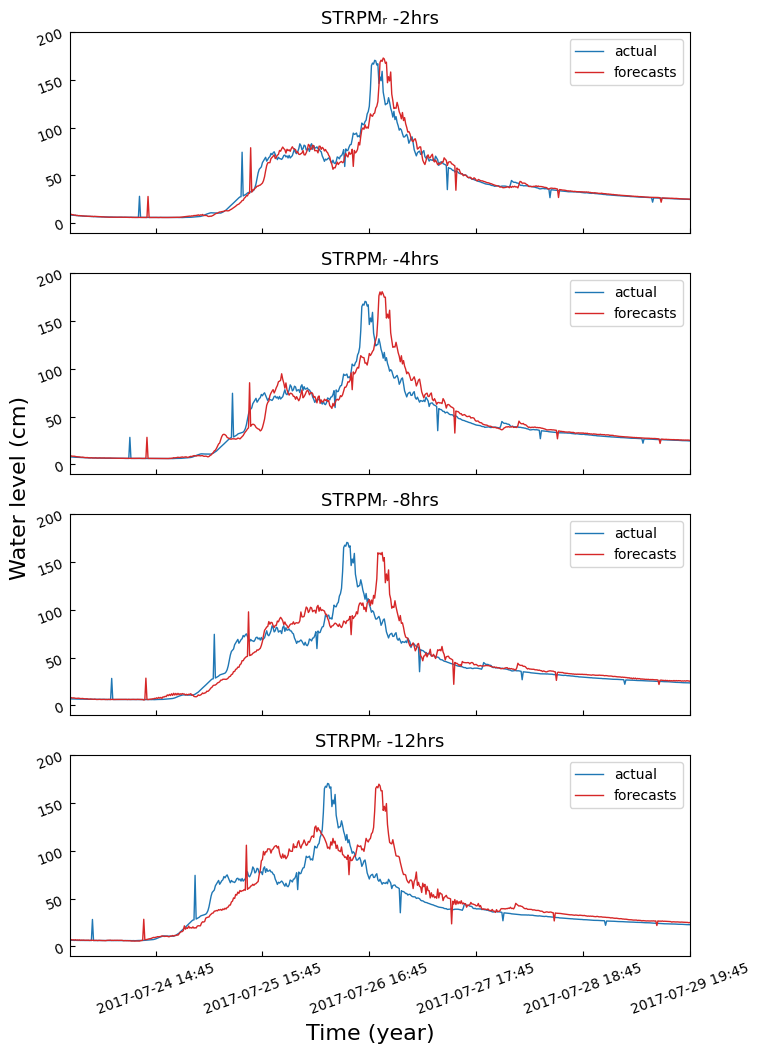

In [477]:
def individualplots(df):
    hours = [2, 4, 8, 12]
    _, ax = plt.subplots(4, 1, figsize=(8, 12), sharex=True, sharey=True)
    for row in range(4):
        df[row]['measured'][18300:18950].plot(subplots=True, ax=ax[row], label='actual', color='tab:blue', lw=1.0)
        df[row]['predicted'][18300:18950].plot(subplots=True, ax=ax[row], label='forecasts', color='tab:red', lw=1.0)
        ax[row].set_ylim(-10, 200)
        ax[row].set_xlim(20, 600)
        ax[row].set_yticks([0.0, 50, 100, 150, 200])
        #ax[row].set_xticks(['2017-07-24 03:45', '2017-07-25 04:45', '2017-07-26 05:45', '2017-07-27 06:45', '2017-07-28 07:45'])
    
        #ax[row].xaxis.set_major_locator(mdates.MonthLocator(interval=4))
        #ax[row].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

        ax[row].set_title(f"STRPM{get_subscript('r')} "+f'{ -  hours[row]}hrs', fontsize=13)
        ax[row].legend()
        ax[row].tick_params(direction="in", labelrotation=20)
    _.text(0.5, 0.04, 'Time (year)', ha='center', fontsize=16)
    _.text(0.05, 0.5, 'Water level (cm)', va='center', rotation='vertical', fontsize=16)
    plt.savefig(f'../final results/STRPMr/Qualitative/STRPMr_results.pdf', dpi=300, bbox_inches = 'tight');

framework_result = individualplots(strpmr)

In [424]:
strpmr[0].index[18320], strpmr[0].index[18820]

('2017-07-23 07:45', '2017-07-28 12:45')

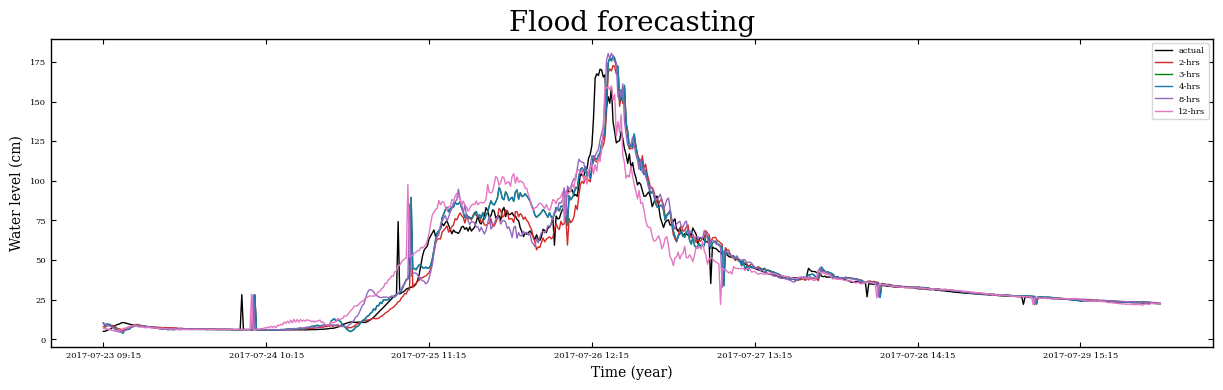

In [10]:
def allplots(df, start, end, t):
    fig, ax = plt.subplots(1, 1, figsize=(15, 4))
    df[0]['measured'][start:end].plot(subplots=True, ax=ax, label='actual', color='black', lw=1.0)
    hours = [2, 3, 4, 8, 12]
    c = ['tab:red', 'green', 'tab:blue', 'tab:purple', 'tab:pink']
    for i in range(5):
        df[i]['predicted'][start:end].plot(subplots=True, ax=ax, label=f'{hours[i]}-hrs', color=c[i], lw=1.0)    
    ax.set_title(t, fontsize=20)
    ax.set_ylabel('Water level (cm)')
    ax.tick_params(direction="in",top=True,right=True,which='both')#, labelrotation=15)
    ax.set_xlabel('Time (year)')
    ax.legend()

allplots(strpmr, 18300, 18950, 'Flood forecasting')

#### Plot STRPMr subplots in one graph

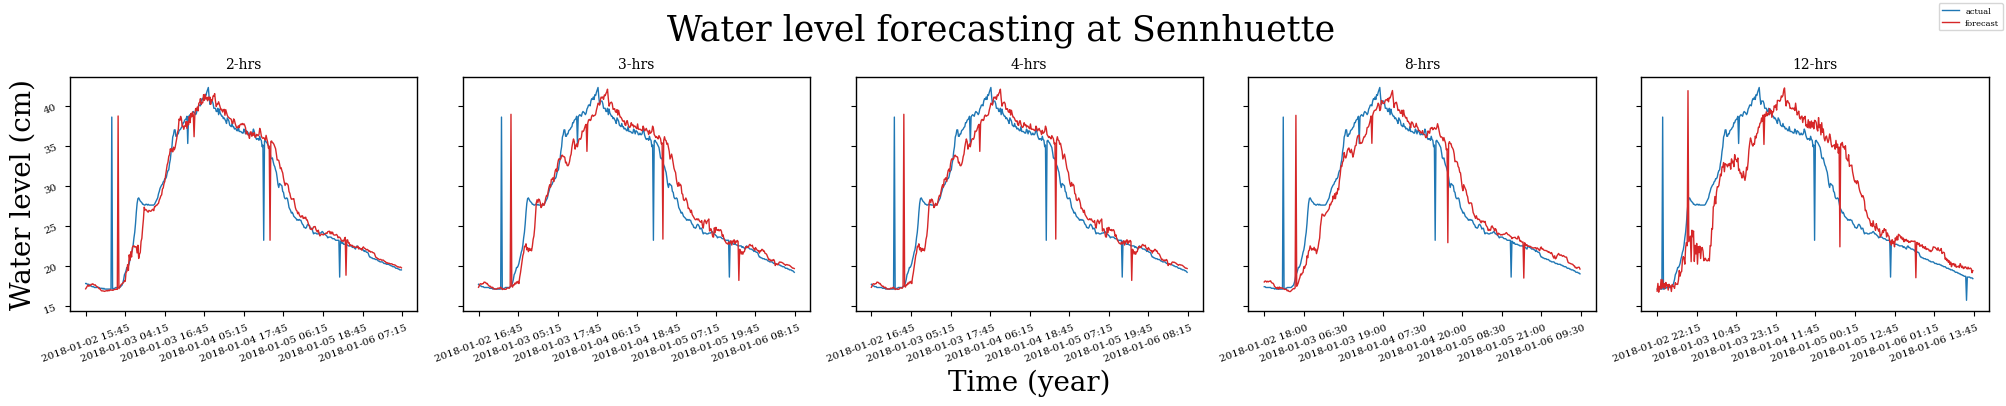

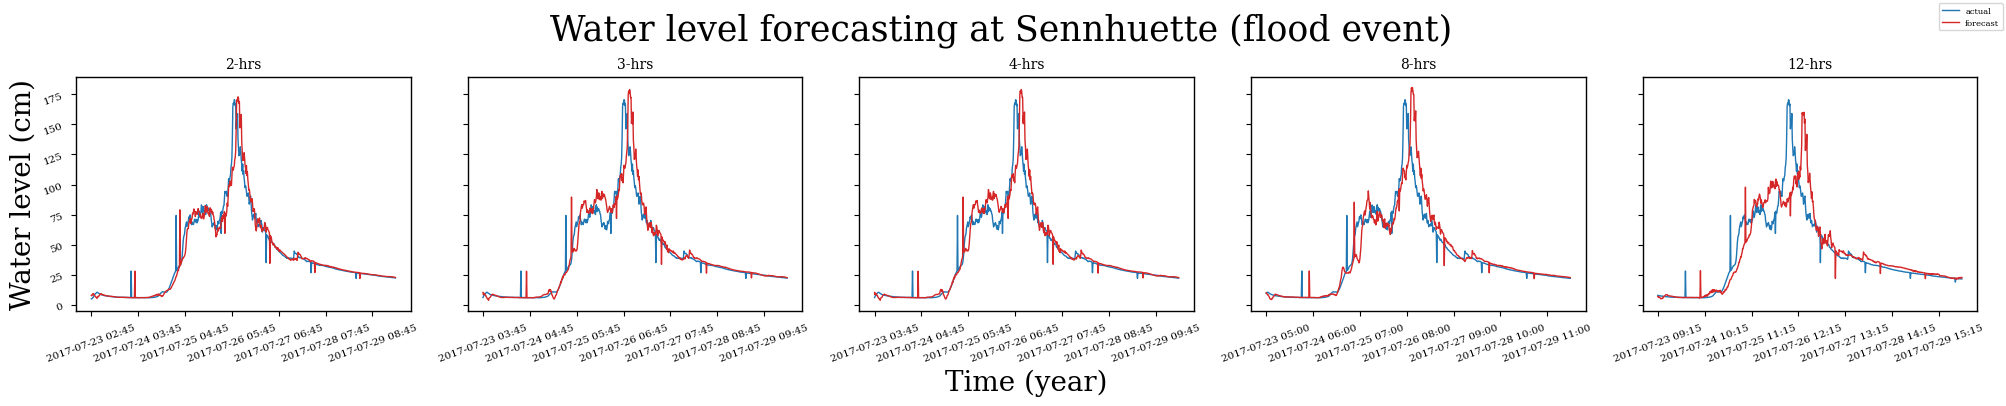

In [11]:
def subplots(df, start, end, title):
    fig, ax = plt.subplots(1, 5, figsize=(20, 4), sharex=False, sharey=True)
    plt.suptitle(title, fontsize=25)
    hours = [2, 3, 4, 8, 12]
    for i in range(5):
        df[i]['measured'][start:end].plot(subplots=True, ax=ax[i], legend=False, color='tab:blue', lw=1.0)
        df[i]['predicted'][start:end].plot(subplots=True, ax=ax[i], legend=False, color='tab:red', lw=1.0)
        if hours[i]==2:
            ax[i].set_ylabel('Water level (cm)', fontsize=20)
        if hours[i]==4:
            ax[i].set_xlabel('Time (year)', fontsize=20)
        ax[i].title.set_text(f'{hours[i]}-hrs',)
        ax[i].tick_params(labelrotation=20, labelsize=7.5, pad=5)
        ax[i].set_xlim(ax[i].get_xlim())
    labels = ['actual', 'forecast']
    fig.legend(labels, loc = 'upper right',  bbox_transform = plt.gcf().transFigure)
    plt.tight_layout()
    plt.savefig(f'../final results/STRPMr/Qualitative/{title}.pdf', dpi=300, bbox_inches = 'tight');

subplots(strpmr, 34000, 34400, 'Water level forecasting at Sennhuette')
subplots(strpmr, 18300, 18950, 'Water level forecasting at Sennhuette (flood event)')

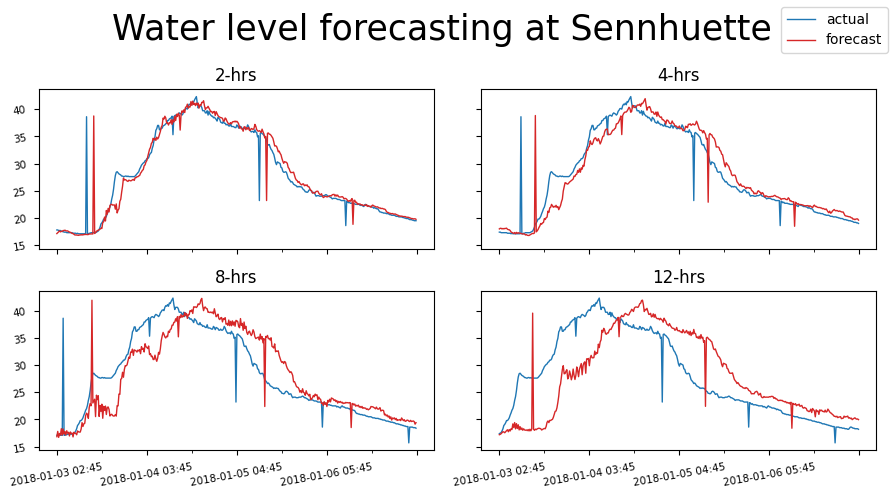

In [323]:
def subplots(df, start, end, title):
    fig, ax = plt.subplots(2, 2, figsize=(9, 5), sharex=True, sharey=True)
    plt.suptitle(title, fontsize=25)
    hours = [2, 4, 8, 12]
    j=0
    for row in range(2):
        for col in range(2):
            df[j]['measured'][start:end].plot(subplots=True, ax=ax[row][col], legend=False, color='tab:blue', lw=1.0)
            df[j]['predicted'][start:end].plot(subplots=True, ax=ax[row][col], legend=False, color='tab:red', lw=1.0)
            ax[row][col].title.set_text(f'{hours[j]}-hrs',)
            ax[row][col].tick_params(labelrotation=10, labelsize=7.5, pad=5)
            j+=1

    labels = ['actual', 'forecast']
    fig.legend(labels, loc = 'upper right',  bbox_transform = plt.gcf().transFigure)
    plt.tight_layout()
    #plt.xlim('2018-01-03 02:30', '2018-01-06 06:00')
    #plt.savefig(f'../final results/STRPMr/Qualitative/{title}.pdf', dpi=300, bbox_inches = 'tight');

subplots(strpmr, 34000, 34400, 'Water level forecasting at Sennhuette')

#### Scatter plot

In [284]:
def scatter_plot(forecast, ax, n):#, colors):
    linearmodel = LinearRegression().fit(forecast['measured'].values.reshape(-1,1), forecast['predicted'])
    r2_square = np.round(r2_score(forecast['measured'].values.reshape(-1,1), forecast['predicted']), 5)
    X_plot = np.linspace(0,150,50)
    coeff = np.round(linearmodel.coef_[0],5)
    intercept = f'{np.round(linearmodel.intercept_, 5)} + '
    ax.scatter(forecast['measured'], forecast['predicted'], alpha=0.45, label='Forecasts')
    ax.plot(X_plot, X_plot * linearmodel.coef_[0] + linearmodel.intercept_, c='black', label=f'y={intercept}{coeff}x\nR2={r2_square}')
    ax.title.set_text(f'{n}-hrs')
    #ax.text(0.27, 0.9, f'y={intercept}{coeff}x\nR2={r2_square}', horizontalalignment='center', verticalalignment='center', fontsize=8, fontweight='bold', transform=ax.transAxes)
    ax.legend(loc=4, fontsize='x-small', facecolor='#eafff5')
    ax.set_facecolor('#eafff5')
    ax.tick_params()    

<Figure size 640x480 with 0 Axes>

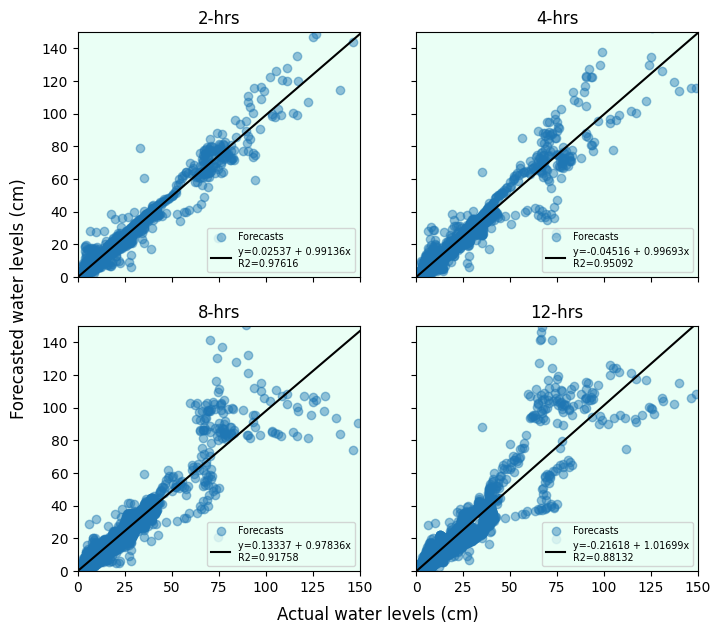

In [291]:
f = plt.figure()    
f, axes = plt.subplots(2,2, sharex=True, sharey=True)
f.set_size_inches(8, 7)
f.text(0.5, 0.04, 'Actual water levels (cm)', ha='center', fontsize=12)
f.text(0.04, 0.5, 'Forecasted water levels (cm)', va='center', rotation='vertical', fontsize=12)
i=0
h=[2, 4, 8, 12]
strpmr_temp = [strpmr2, strpmr4, strpmr8, strpmr12]
for row in range(2):
    for col in range(2):
        scatter_plot(strpmr_temp[i], axes[row][col], h[i])
        i+=1
plt.xlim(0, 150)
plt.ylim(0, 150)
plt.savefig('../final results/STRPMr/Qualitative/Scatter plots_observed vs forecasted water levels.pdf', dpi=300, bbox_inches = 'tight');
plt.show()

<Figure size 640x480 with 0 Axes>

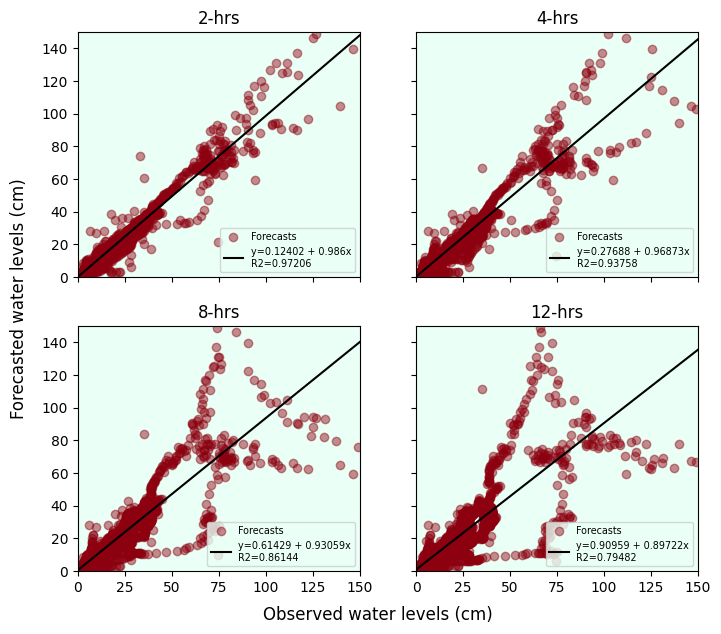

In [277]:
def scatter_plot_baseline(forecast, ax, n):#, colors):
    linearmodel = LinearRegression().fit(forecast['measured'].values.reshape(-1,1), forecast['predicted'])
    r2_square = np.round(r2_score(forecast['measured'].values.reshape(-1,1), forecast['predicted']), 5)
    X_plot = np.linspace(0,150,50)
    coeff = np.round(linearmodel.coef_[0],5)
    intercept = f'{np.round(linearmodel.intercept_, 5)} + '
    ax.scatter(forecast['measured'], forecast['predicted'], alpha=0.45, c='xkcd:crimson', label='Forecasts')
    ax.plot(X_plot, X_plot * linearmodel.coef_[0] + linearmodel.intercept_, c='black', label=f'y={intercept}{coeff}x\nR2={r2_square}')
   
    ax.title.set_text(f'{n}-hrs')
    #ax.text(0.27, 0.9, f'y={intercept}{coeff}x\nR2={r2_square}', horizontalalignment='center', verticalalignment='center', fontsize=8, fontweight='bold', transform=ax.transAxes)
    ax.legend(loc=4, fontsize='x-small', facecolor='#eafff5')
    ax.set_facecolor('#eafff5')

f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)
f.set_size_inches(8, 7)
f.text(0.5, 0.04, 'Observed water levels (cm)', ha='center', fontsize=12)
f.text(0.04, 0.5, 'Forecasted water levels (cm)', va='center', rotation='vertical', fontsize=12)
i=0
h=[2, 4, 8, 12]
b_temp = [baseline2, baseline4, baseline8, baseline12]
for row in range(2):
    for col in range(2):
        scatter_plot_baseline(b_temp[i], axes[row][col], h[i])
        i+=1
plt.xlim(0, 150)
plt.ylim(0, 150)
plt.show()

#### Plot Göttingen results

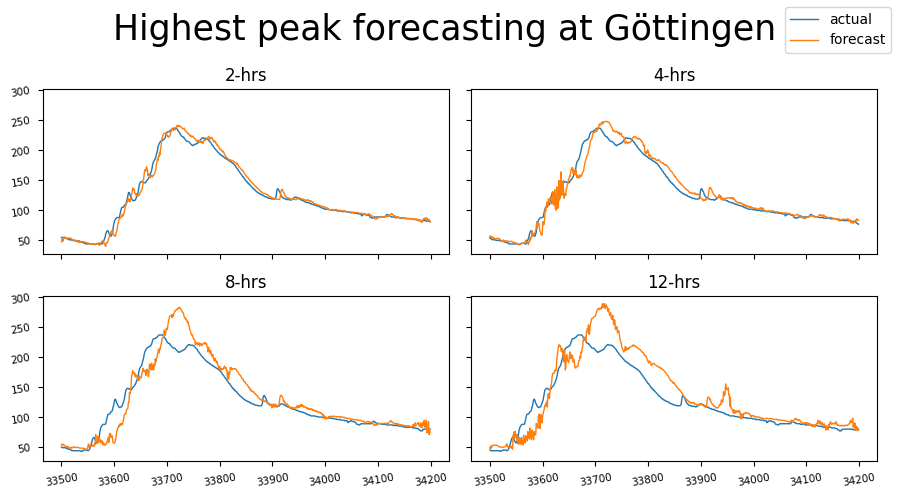

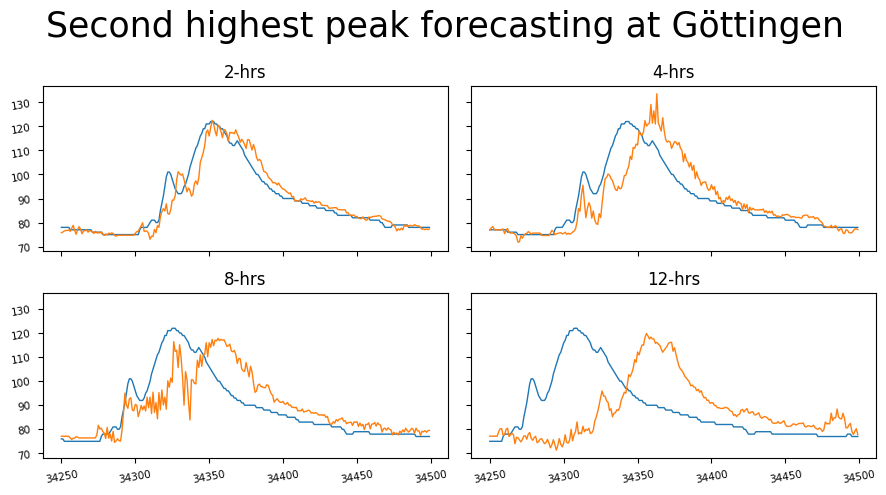

In [483]:
def Göttingensubplots(df, start, end, title, leg):
    fig, ax = plt.subplots(2, 2, figsize=(9, 5), sharex=True, sharey=True)
    plt.suptitle(title, fontsize=25)
    hours = [2, 4, 8, 12]
    j=0
    for row in range(2):
        for col in range(2):
            df[j]['measured'][start:end].plot(subplots=True, ax=ax[row][col], legend=False, color='tab:blue', lw=1.0)
            df[j]['predicted'][start:end].plot(subplots=True, ax=ax[row][col], legend=False, color='tab:orange', lw=1.0)
            ax[row][col].title.set_text(f'{hours[j]}-hrs',)
            ax[row][col].tick_params(labelrotation=10, labelsize=7.5, pad=5)
            j+=1

    if leg==True:
        labels = ['actual', 'forecast']
        fig.legend(labels, loc = 'upper right',  bbox_transform = plt.gcf().transFigure)
    plt.tight_layout()
    #plt.xlim('2018-01-03 02:30', '2018-01-06 06:00')
    plt.savefig(f'../final results/validation_with_Göttingen_data/STRPMr/Qualitative//{title}.pdf', dpi=300, bbox_inches = 'tight');

Göttingensubplots(gott_strpmr, 33500, 34200, 'Highest peak forecasting at Göttingen', True)
Göttingensubplots(gott_strpmr, 34250, 34500, 'Second highest peak forecasting at Göttingen', False)

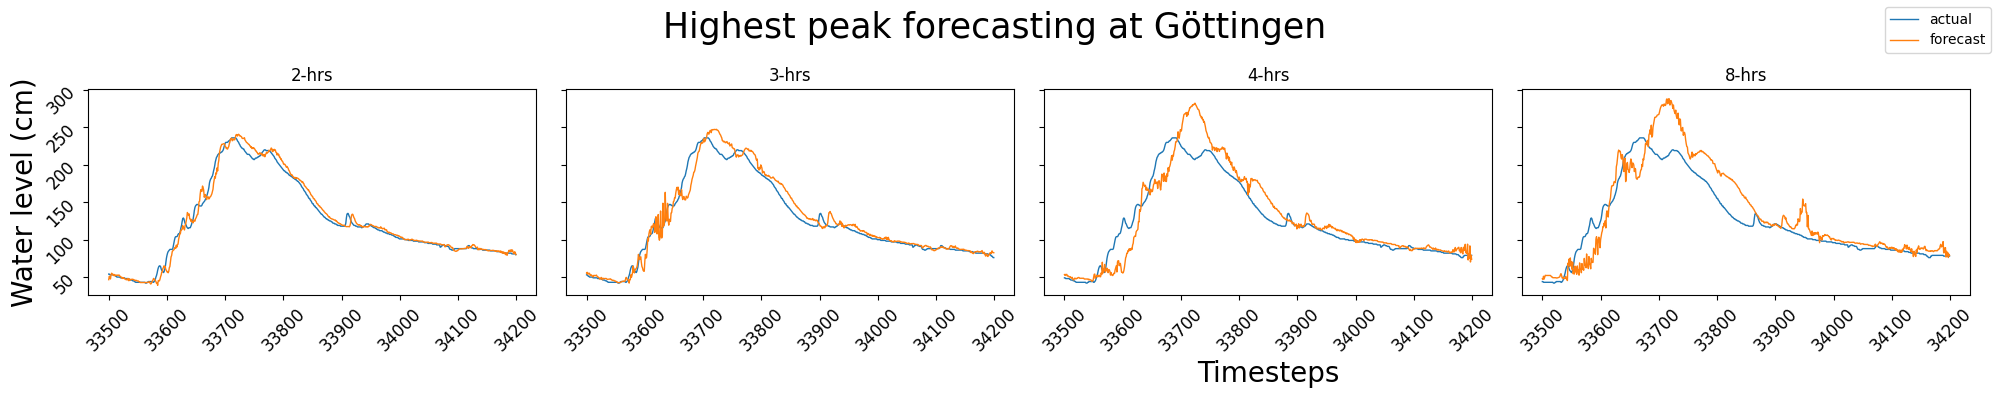

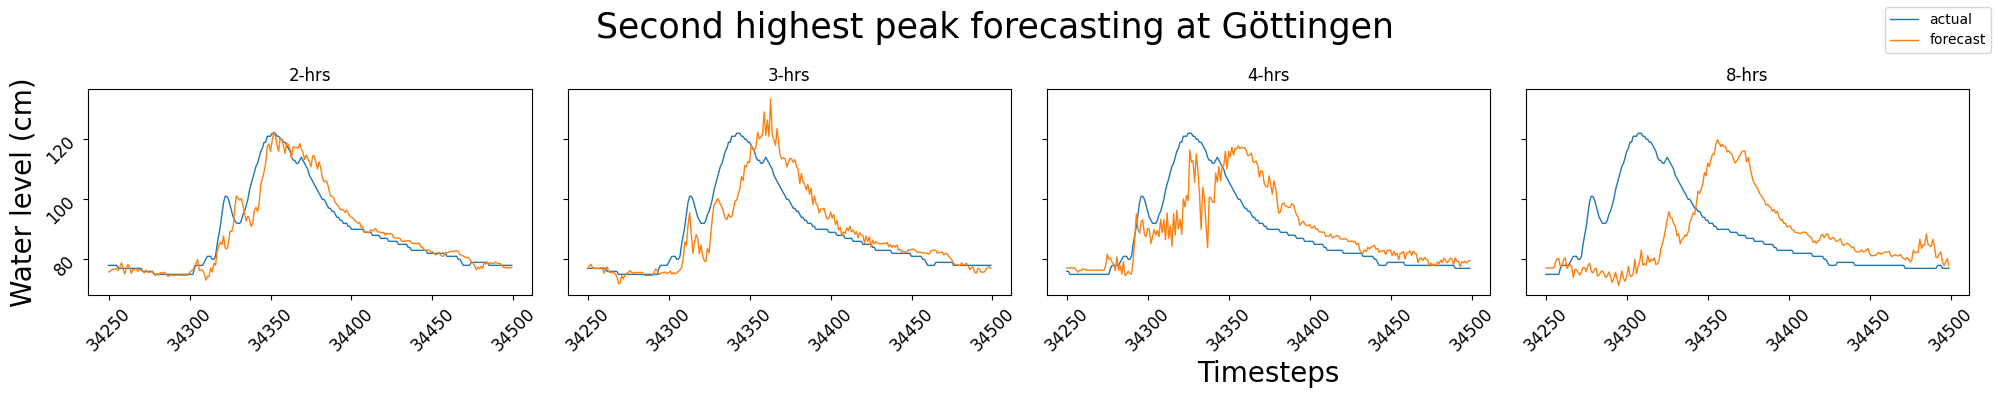

In [ ]:
def Göttingensubplots(df, start, end, title, y):
    fig, ax = plt.subplots(1, 4, figsize=(20, 4), sharex=False, sharey=True)
    plt.suptitle(title, fontsize=25)
    hours = [2, 3, 4, 8, 12]
    for i in range(4):
        df[i]['measured'][start:end].plot(subplots=True, ax=ax[i], legend=False, color='tab:blue', lw=1.0)
        df[i]['predicted'][start:end].plot(subplots=True, ax=ax[i], legend=False, color='tab:orange', lw=1.0)
        if hours[i]==2:
            ax[i].set_ylabel('Water level (cm)', fontsize=20)
        if hours[i]==4:
            ax[i].set_xlabel('Timesteps', fontsize=20)
        ax[i].title.set_text(f'{hours[i]}-hrs')
        ax[i].tick_params(labelrotation=45, labelsize=12)
    #ax[i].tick_params(direction="in",top=True,right=True,which='both', labelrotation=20, labelrotation=45, labelsize=12)
    #if y==True:
    #    ax[i].set_yticks([0.0, 50, 100, 150, 200, 250])
    labels = ['actual', 'forecast']
    fig.legend(labels, loc = 'upper right',  bbox_transform = plt.gcf().transFigure)
    plt.tight_layout()
    plt.savefig(f'../final results/validation_with_Göttingen_data/STRPMr/Qualitative/{title}.pdf', dpi=300, bbox_inches = 'tight');

Göttingensubplots(gott_strpmr, 33500, 34200, 'Highest peak forecasting at Göttingen', True)
Göttingensubplots(gott_strpmr, 34250, 34500, 'Second highest peak forecasting at Göttingen', False)